# Scikit-learn Preprocessing 

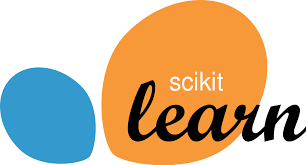

<hr>
<hr>

In [1]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregando dados 
path = 'iris.csv'
iris = pd.read_csv(path)


X = iris.drop('variety', axis=1)
y = iris['variety']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<hr>
<hr>

## Standardization


A StandardScaler assume os seus dados são normalmente distribuídos dentro de cada recurso e vai dimensioná-los de tal modo que a distribuição é agora centrada em torno de 0, com um desvio padrão de 1.

O objetivo é alcançar uma Distribuição Normal para cada Feature do conjunto de dados, com média = 0 e desvio padrão e variância = 1. 

A média e o desvio padrão são calculados para o recurso e, em seguida, o recurso é escalado com base em:

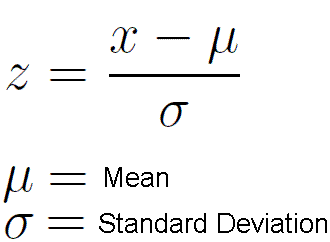

In [3]:
# Standard Scaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[0:5]

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282]])

In [4]:
# Resultados 
print('Média: ', scaler.mean_)
print('Variância: ', scaler.var_)
print('Desvio Padrão: ', scaler.scale_)

Média:  [5.80916667 3.06166667 3.72666667 1.18333333]
Variância:  [0.67299931 0.20003056 3.04512222 0.56122222]
Desvio Padrão:  [0.82036535 0.44724776 1.74502786 0.74914766]


In [5]:
scaling = pd.DataFrame()
scaling['Features'] = X.columns
scaling['Média'] = scaler.mean_
scaling['Variância'] = scaler.var_
scaling['Desvio Padrão'] = scaler.scale_

scaling.sort_values(by=['Média'],ascending=True, )

,Features,Média,Variância,Desvio Padrão
3,petal.width,1.183333,0.561222,0.749148
1,sepal.width,3.061667,0.200031,0.447248
2,petal.length,3.726667,3.045122,1.745028
0,sepal.length,5.809167,0.672999,0.820365


<br>
<hr>
<hr>


## Min Max Scaler

MinMaxScaler escala os dados dentro de um intervalo de valores definidos por padrão é 0 e 1.  

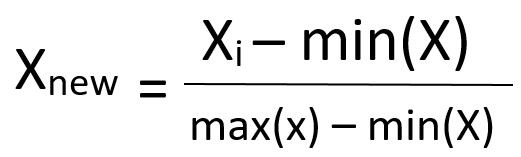

In [6]:
# MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

min_scaler = MinMaxScaler(feature_range=(0,1))

X_train = min_scaler.fit_transform(X_train)
X_test = min_scaler.transform(X_test)

In [7]:
X_train[:5]

array([[0.08823529, 0.66666667, 0.        , 0.04166667],
       [0.41176471, 1.        , 0.0877193 , 0.125     ],
       [0.70588235, 0.45833333, 0.59649123, 0.54166667],
       [0.14705882, 0.58333333, 0.10526316, 0.04166667],
       [0.02941176, 0.5       , 0.05263158, 0.04166667]])

In [8]:
X_test[0:5]

array([[0.52941176, 0.33333333, 0.64912281, 0.45833333],
       [0.41176471, 0.75      , 0.12280702, 0.08333333],
       [1.        , 0.25      , 1.03508772, 0.91666667],
       [0.5       , 0.375     , 0.61403509, 0.58333333],
       [0.73529412, 0.33333333, 0.66666667, 0.54166667]])

<br>
<br>
<hr>
<hr>

## RobustScaler 

Funciona de maneira semelhante ao StandardScaler, exceto pelo uso de mediana e quartis, em vez de média e variância. Bom, pois ignora os pontos de dados discrepantes.

<b> Um ótimo Normalizador robusto para conjunto de dados que contém Outliers
    <hr>

In [9]:
from sklearn.preprocessing import RobustScaler 

robust = RobustScaler(quantile_range=(25.0, 75.0)) #

X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

In [10]:
# Mediana
print('Mediana: ', robust.center_)
print('intervalo interquartil IQR: ', robust.scale_)

Mediana:  [0.42647059 0.41666667 0.57017544 0.5       ]
intervalo interquartil IQR:  [0.38235294 0.25       0.63157895 0.625     ]


In [11]:
X_train[0:5]

array([[-0.88461538,  1.        , -0.90277778, -0.73333333],
       [-0.03846154,  2.33333333, -0.76388889, -0.6       ],
       [ 0.73076923,  0.16666667,  0.04166667,  0.06666667],
       [-0.73076923,  0.66666667, -0.73611111, -0.73333333],
       [-1.03846154,  0.33333333, -0.81944444, -0.73333333]])

<br>
<hr>
<hr>

## Nomalizer 

Normalize as amostras individualmente para a norma da unidade.

Cada amostra (ou seja, cada linha da matriz de dados) com pelo menos um componente diferente de zero é redimensionada independentemente de outras amostras, de modo que sua norma (l1 ou l2) seja igual a uma.

In [12]:
from sklearn.preprocessing import Normalizer 

normalizer = Normalizer(norm='l2') # Norm = l1 , l2(padrão), max 

X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [13]:
X_train[:5]

array([[-0.499589  ,  0.56475278, -0.50984626, -0.41415204],
       [-0.0152158 ,  0.92309213, -0.30220278, -0.23736655],
       [ 0.96964545,  0.22114721,  0.0552868 ,  0.08845888],
       [-0.50938534,  0.46470241, -0.51310892, -0.51117266],
       [-0.67049442,  0.21522043, -0.52908356, -0.47348495]])

<br>
<hr>

#### Diferença entre Padronizadores - Normalizadores

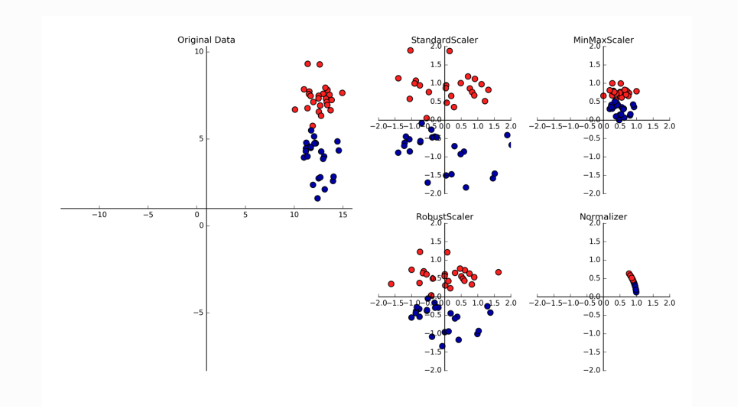

<br>
<br>
<hr>
<hr>


## MaxAbsScaler

Escala cada Feature pelo seu valor absoluto máximo. 

Esse normalizador dimensiona e traduz cada Feature individualmente, de modo que o valor absoluto máximo de cada Feature no conjunto de treinamento seja 1,0. Ele não desloca / centraliza os dados e, portanto, não destrói nenhuma dispersão.

In [14]:
from sklearn.preprocessing import MaxAbsScaler 

max_scaler = MaxAbsScaler()

X_train = max_scaler.fit_transform(X_train)
X_test = max_scaler.transform(X_test)

In [15]:
print('Escala: ', max_scaler.scale_)
print('Valor Absoluto: ', max_scaler.max_abs_)

Escala:  [0.99284897 0.98812536 0.64988257 0.87269644]
Valor Absoluto:  [0.99284897 0.98812536 0.64988257 0.87269644]


<br>
<br>
<hr>
<hr>
<hr>

## PowerTransformer

Aplique uma transformação de potência featurewise para tornar os dados mais semelhantes aos gaussianos.

As transformações de potência são uma família de transformações paramétricas e monotônicas que são aplicadas para tornar os dados mais semelhantes aos gaussianos. Isso é útil para modelar problemas relacionados à heterocedasticidade (variação não constante) ou outras situações em que a normalidade é desejada.
<br>

Observe que o Box-Cox só pode ser aplicado a dados estritamente positivos. mas se houver valores negativos, a Yeo-Johnson transformada é a preferida.



<b> A PowerTransformer é útil como uma transformação em problemas de modelagem onde se deseja homocedasticidade e normalidade </b>

In [16]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(method='yeo-johnson') # box-cox e yeo-johnson 

X_train = power.fit_transform(X_train)
X_test = power.transform(X_test)

In [17]:
# Os parâmetros da transformação de energia para as Features selecionados.
print(power.lambdas_) 

[0.66049305 1.40436612 1.37908902 0.81312289]


<br>
<br>
<hr>
<hr>
<hr>

## QuantileTransformer

Transforma as Features usando informações de quantis.

Este método transforma as Features para seguir uma distribuição uniforme ou normal. Portanto, para uma determinada Feature, essa transformação tende a espalhar os valores mais frequentes. Também reduz o impacto de outliers (marginais): esse é, portanto, um esquema robusto de pré-processamento.


A transformação é aplicada em cada Feature de forma independente. Primeiro, uma estimativa da função de distribuição cumulativa de um recurso é usada para mapear os valores originais para uma distribuição uniforme. Os valores obtidos são então mapeados para a distribuição de saída desejada usando a função quantil associada. Os valores das Variáveis de dados novos / não vistos que caem abaixo ou acima do intervalo ajustado serão mapeados para os limites da distribuição de saída. Observe que essa transformação é não linear. Pode distorcer correlações lineares entre variáveis medidas na mesma escala, mas torna as variáveis medidas em escalas diferentes mais diretamente comparáveis.

In [18]:
from sklearn.preprocessing import QuantileTransformer 

quantile = QuantileTransformer() # output_distribution = (uniform, normal) 
                                 # n_quantiles = Número de quantis a serem calculados para a função de distribuição cumulativa

X_train = quantile.fit_transform(X_train)
X_test = quantile.transform(X_test)

In [19]:
# O número real de quantis usados para discretizar a função de distribuição cumulativa
print('Número de Quartis: ', quantile.n_quantiles_)

# Valores dos Quartis 
print('Quartis valores: ', quantile.quantiles_)

Número de Quartis:  120
Quartis valores:  [[-2.08590617 -1.50393577 -1.49109417 -2.13080106]
 [-1.93053273 -1.50093956 -1.44341147 -1.51809073]
 [-1.51652474 -1.49982706 -1.4373264  -1.44320709]
 [-1.51086396 -1.4903471  -1.42621756 -1.43357152]
 [-1.50783528 -1.48546104 -1.40268071 -1.42632023]
 [-1.4753751  -1.48473934 -1.38234246 -1.37865193]
 [-1.40076036 -1.48173137 -1.36762916 -1.35889844]
 [-1.39908898 -1.48173137 -1.34900773 -1.34277548]
 [-1.35738542 -1.47564282 -1.31511792 -1.33205741]
 [-1.34050967 -1.46004337 -1.31322226 -1.30155531]
 [-1.31563258 -1.45820765 -1.29767522 -1.28995446]
 [-1.28559369 -1.44004047 -1.29305952 -1.28624908]
 [-1.26728733 -1.43077831 -1.28602527 -1.27593445]
 [-1.16490345 -1.41858885 -1.28043665 -1.26861683]
 [-1.15843445 -1.40922358 -1.27791379 -1.24821347]
 [-1.15203871 -1.34563756 -1.27564195 -1.24819337]
 [-1.15073451 -1.34335075 -1.26584198 -1.23252309]
 [-1.14534049 -1.32288693 -1.25849386 -1.1983844 ]
 [-1.12656429 -1.27902292 -1.25648621 -1

<br>
<br>
<hr>
<hr>
<hr>